### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - \$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [9]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [11]:
# checking counts and data type for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

(12684, 26)

In [13]:
# data count
print(data.shape)

# checking for the presence of null values
missing_vals = data.isnull().sum()

print(type(missing_vals))
missing_vals

(12684, 26)
<class 'pandas.core.series.Series'>


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [15]:
# lets get the list of numerical and categorical columns
column_names = data.columns.tolist()

column_names

['destination',
 'passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

In [17]:
# Explore if we need these columns for our analysis
cols = ['car', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'Y']
for col in cols:
    print(f'{col}: {data[col].unique()}')

# conclusion: We don't need these columns `'car', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'`. 
# Also, the column 'Y' is recoding the acceptance of the coupon by the user

car: [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
toCoupon_GEQ5min: [1]
toCoupon_GEQ15min: [0 1]
toCoupon_GEQ25min: [0 1]
Y: [1 0]


In [1045]:
# Understand the values/nature of the numerical columns
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [19]:
"""
1. Based on the previous data exploration phase, figured out that we may not need these columns for the analysis 
 `'car', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'`.
 
2. Since these fields have NaN values and also the no of values are less compared to the overall no of rows, we can drop them
        Bar                       107
        CoffeeHouse               217
        CarryAway                 151
        RestaurantLessThan20      130
        Restaurant20To50          189
3. The column 'Y' is recoding the acceptance of the coupon by the user, so its better to rename it to coupon_accepted
4. For better readability/ uniformity I am renaming,
    1. maritalStatus -> marital_status
    2. Bar -> bar
    3. CoffeeHouse -> coffee_house
    4. CarryAway -> carry_away
    5. RestaurantLessThan20 -> restaurant_less_than_20
    6. Restaurant20To50 -> restaurant_20_to_50
"""

data.drop(columns=['car', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], inplace=True)

data.dropna(inplace=True)

data.rename(columns={'Y':'coupon_accepted', 'maritalStatus': 'marital_status', 'Bar': 'bar', 'CoffeeHouse': 'coffee_house', 'CarryAway': 'carry_away', 'RestaurantLessThan20': 'restaurant_less_than_20', 'Restaurant20To50': 'restaurant_20_to_50' }, inplace=True)

print(data.shape)
data.isnull().sum()

(12079, 22)


destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
marital_status             0
has_children               0
education                  0
occupation                 0
income                     0
bar                        0
coffee_house               0
carry_away                 0
restaurant_less_than_20    0
restaurant_20_to_50        0
direction_same             0
direction_opp              0
coupon_accepted            0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [22]:
coupon_accepted = data['coupon_accepted'].mean()

print(f'{"Chose to accept the coupon"} : {coupon_accepted:.2%}')

Chose to accept the coupon : 56.93%


5. Use a bar plot to visualize the `coupon` column.

In [24]:
print(f'{col}: {data['coupon'].unique()}')

Y: ['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']


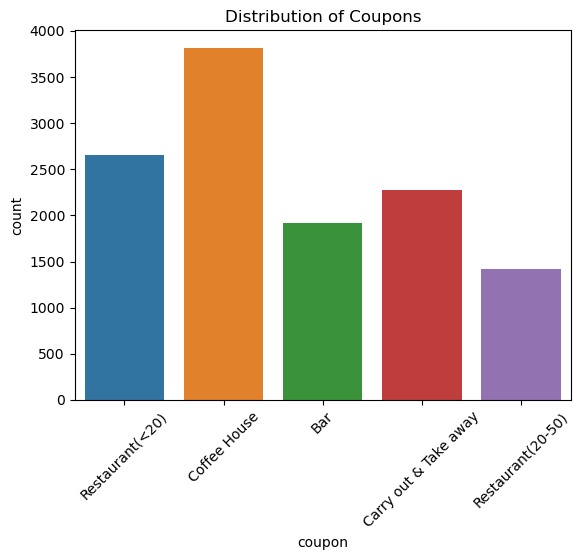

In [26]:
sns.countplot(data=data, x='coupon', hue= 'coupon')

plt.xticks(rotation=45)
plt.title('Distribution of Coupons')
plt.xlabel('coupon')
plt.savefig("images/distribution_of_coupons.png")
plt.show()


####  2. How about when we are traveling in the same direction


6. Use a histogram to visualize the temperature column.

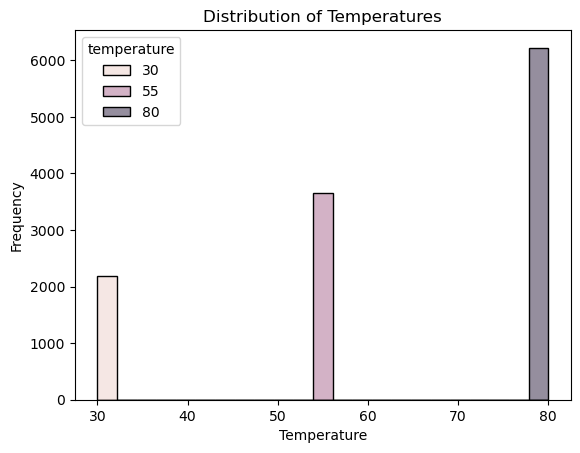

In [28]:
sns.histplot(data = data, x = 'temperature', hue='temperature')
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig('images/distribution_of_temperatures.png')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [30]:
bar_coupon_data = data.query('coupon == "Bar"').copy()

print(bar_coupon_data.shape)

bar_coupon_data.head()

(1913, 22)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,occupation,income,bar,coffee_house,carry_away,restaurant_less_than_20,restaurant_20_to_50,direction_same,direction_opp,coupon_accepted
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,Student,$12500 - $24999,never,4~8,1~3,1~3,never,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0


2. What proportion of bar coupons were accepted?


In [32]:
bar_coupon_accepted = bar_coupon_data['coupon_accepted'].mean()

print(f'{"Chose to accept the bar coupon"} : {bar_coupon_accepted:.2%}')

Chose to accept the bar coupon : 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


----------------------------------------------------------------------
Distinct bar values : ['never' 'less1' '1~3' 'gt8' '4~8']
----------------------------------------------------------------------


Those visited less than 3: 37.27%
Those visited more than 3: 76.17%


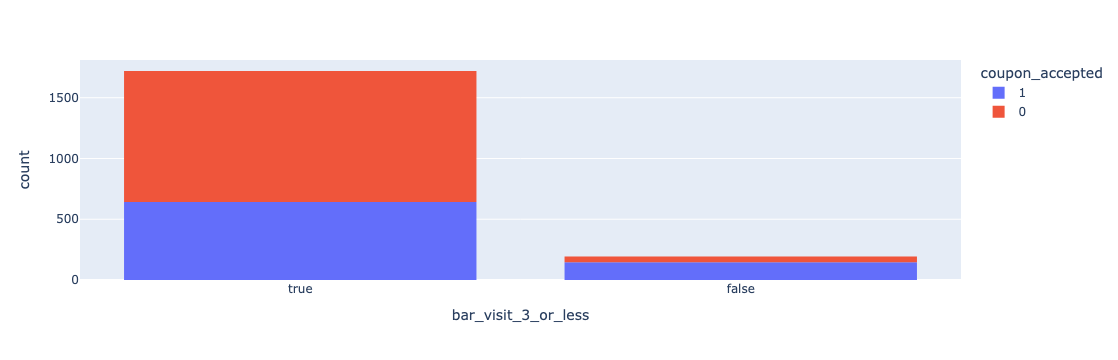

In [36]:
# add a new column to the bar_data to indicate if the person is visiting the bar 3 or fewer time a month or more
print(f'{'----------------------------------------------------------------------'}')
print(f'{'Distinct bar values'} : {bar_coupon_data['bar'].unique()}')
print(f'{'----------------------------------------------------------------------\n\n'}')

bar_coupon_data['bar_visit_3_or_less'] = bar_coupon_data['bar'].apply(lambda col: col in ['never', 'less1', '1~3'])
#bar_coupon_data.head()

bar_coupon_accepted_by_less_than_3_visits = bar_coupon_data.groupby('bar_visit_3_or_less')['coupon_accepted'].mean()

print(f'{'Those visited less than 3'}: {bar_coupon_accepted_by_less_than_3_visits[True]:.2%}')
print(f'{'Those visited more than 3'}: {bar_coupon_accepted_by_less_than_3_visits[False]:.2%}')

import plotly.io as pio

fig = px.histogram(data_frame=bar_coupon_data, x='bar_visit_3_or_less', color='coupon_accepted')
fig.write_image("images/bar_visit_3_or_less.png", format="png", width=800, height=600, scale=2)
fig.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


----------------------------------------------------------------------
Distinct age        : ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Distinct bar values : ['never' 'less1' '1~3' 'gt8' '4~8']
----------------------------------------------------------------------


Those visited bar more than once and age of 25 to all others: 68.98%
Those visited bar less than 1 or age less than 25: 33.77%


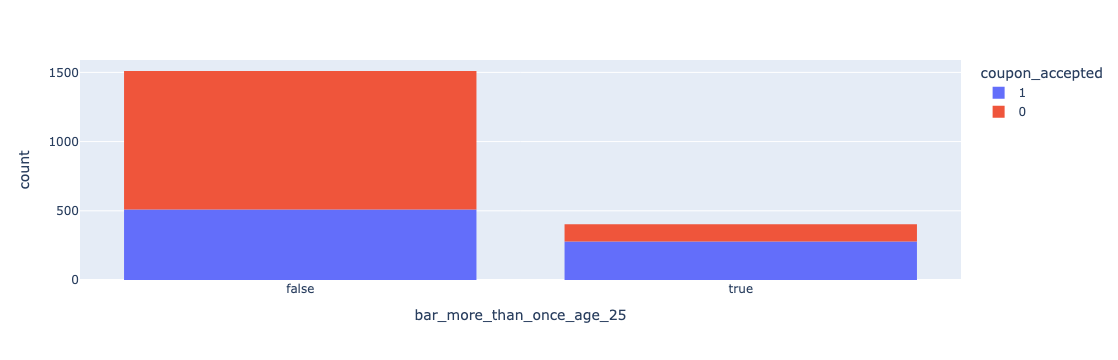

In [38]:
# add a new column match_criteria to the bar_data
print(f'{'----------------------------------------------------------------------'}')
print(f'\033[1m{'Distinct age       '}\033[0m : {bar_coupon_data['age'].unique()}')
print(f'\033[1m{'Distinct bar values'}\033[0m : {bar_coupon_data['bar'].unique()}')
print(f'{'----------------------------------------------------------------------\n\n'}')

bar_coupon_data['bar_more_than_once_age_25'] = bar_coupon_data.apply(lambda row: (row['bar'] not in ["never","less1"]) & (row['age'] not in ["21", "below21"]), axis=1)

bar_coupon_more_than_once_age_25 = bar_coupon_data.groupby('bar_more_than_once_age_25')['coupon_accepted'].mean()

print(f'\033[1m{'Those visited bar more than once and age of 25 to all others'}\033[0m: \033[94m{bar_coupon_more_than_once_age_25[True]:.2%}\033[0m')
print(f'\033[1m{'Those visited bar less than 1 or age less than 25'}\033[0m: \033[94m{bar_coupon_more_than_once_age_25[False]:.2%}\033[0m')


fig = px.histogram(data_frame=bar_coupon_data, x='bar_more_than_once_age_25', color='coupon_accepted')
fig.write_image("images/bar_more_than_once_age_25.png", format="png", width=800, height=600, scale=2)
fig.show()

#px.histogram(data_frame=bar_coupon_data, x='bar', color='coupon_accepted', facet_row='bar_more_than_once_age_25')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


----------------------------------------------------------------------
Distinct bar values     : ['never' 'less1' '1~3' 'gt8' '4~8']
Distinct passenger      : ['Friend(s)' 'Alone' 'Kid(s)' 'Partner']
Distinct occupations    : ['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Production Occupations' 'Building & Grounds Cleaning & Maintenance'
 'Farming Fishing & Forestry']
----------------------------------------------------------------------


Those visited bar more than onc

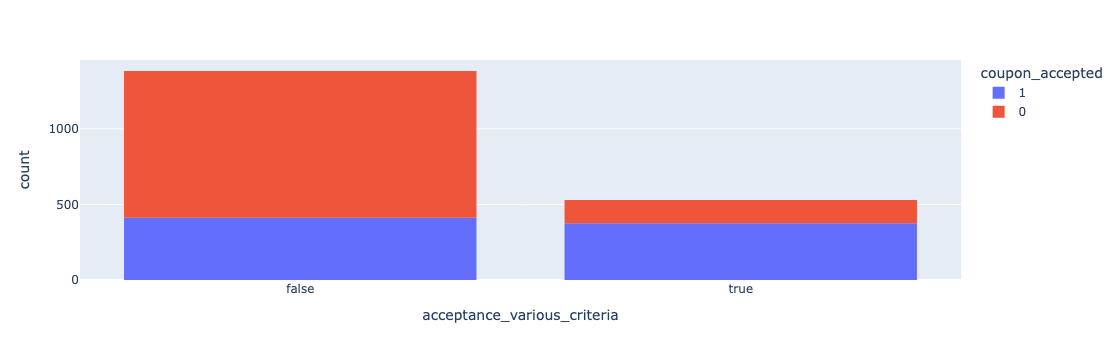

In [40]:
print(f'{'----------------------------------------------------------------------'}')
print(f'\033[1m{'Distinct bar values    '}\033[0m : {bar_coupon_data['bar'].unique()}')
print(f'\033[1m{'Distinct passenger     '}\033[0m : {bar_coupon_data['passanger'].unique()}')
print(f'\033[1m{'Distinct occupations   '}\033[0m : {bar_coupon_data['occupation'].unique()}')

print(f'{'----------------------------------------------------------------------\n\n'}')

bar_coupon_data['acceptance_various_criteria'] = bar_coupon_data.apply(lambda row: ((row['bar'] in ['1~3', 'gt8', '4~8']) & (row['passanger'] not in ['Kid(s)']) & (row['occupation'] not in ['Farming Fishing & Forestry'])), axis=1)
bar_coupon_acceptance_various_criteria = bar_coupon_data.groupby('acceptance_various_criteria')['coupon_accepted'].mean()

print(f'\033[1m{'Those visited bar more than once and passengers were not kids and occupation other than farming, fishing, or forestry'}\033[0m: \033[94m{bar_coupon_acceptance_various_criteria[True]:.2%}\033[0m')
print(f'\033[1m{'Those who doesn\'t match the criteria'}\033[0m: \033[94m{bar_coupon_acceptance_various_criteria[False]:.2%}\033[0m')


fig = px.histogram(data_frame=bar_coupon_data, x='acceptance_various_criteria', color='coupon_accepted')
fig.write_image("images/bar_acceptance_various_criteria.png", format="png", width=800, height=600, scale=2)
fig.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



----------------------------------------------------------------------
Distinct bar values: ['never' 'less1' '1~3' 'gt8' '4~8']
Distinct passenger: ['Friend(s)' 'Alone' 'Kid(s)' 'Partner']
Distinct age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Distinct income: ['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
Distinct restaurant less than 20: ['4~8' '1~3' 'less1' 'gt8' 'never']
Distinct marital status: ['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
----------------------------------------------------------------------


go to bars more than once a month, had passengers that were not a kid, and were not widowed OR 
 go to bars more than once a month and are under the age of 30 OR 
 go to cheap restaurants more than 4 times a month and income is less than 50K.   : 47.71%
Those who doesn't match the criteria: 31.71%


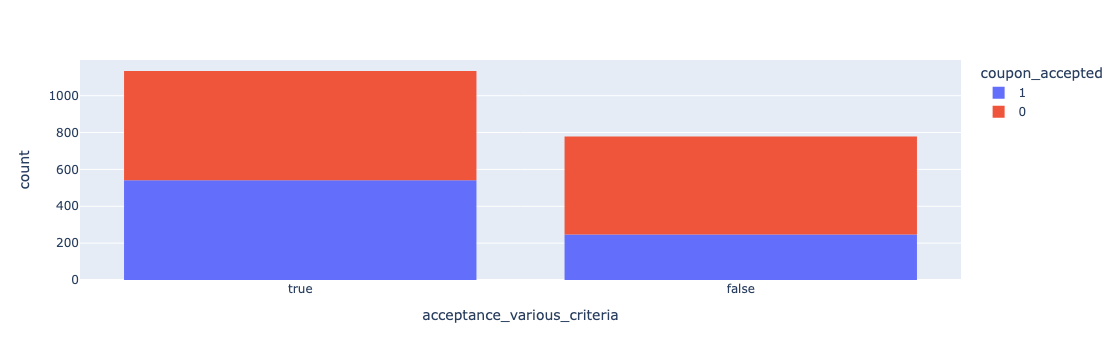

In [42]:
print(f'{'----------------------------------------------------------------------'}')
print(f'\033[1m{'Distinct bar values'}\033[0m: {bar_coupon_data['bar'].unique()}')
print(f'\033[1m{'Distinct passenger'}\033[0m: {bar_coupon_data['passanger'].unique()}')
print(f'\033[1m{'Distinct age'}\033[0m: {bar_coupon_data['age'].unique()}')
print(f'\033[1m{'Distinct income'}\033[0m: {bar_coupon_data['income'].unique()}')
print(f'\033[1m{'Distinct restaurant less than 20'}\033[0m: {bar_coupon_data['restaurant_less_than_20'].unique()}')
print(f'\033[1m{'Distinct marital status'}\033[0m: {bar_coupon_data['marital_status'].unique()}')

print(f'{'----------------------------------------------------------------------\n\n'}')



bar_coupon_data['acceptance_various_criteria'] = bar_coupon_data.apply(lambda row: (
                    (row['bar'] not in ['never' 'less1']) & (row['passanger'] not in ['Alone', 'Kid(s)']) & (row['marital_status'] != 'Widowed') or 
                    (row['bar'] not in ['never' 'less1']) & (row['age'] in ['21', '26', 'below21']) or 
                    (row['restaurant_less_than_20'] in ['gt8' '4~8']) & (row['income'] in ['$12500 - $24999', '$37500 - $49999', '$25000 - $37499', 'Less than $12500'])
                    ), axis=1)


bar_coupon_accepted_by_match_criteria = bar_coupon_data.groupby('acceptance_various_criteria')['coupon_accepted'].mean()


print(f'\033[1m{'go to bars more than once a month, had passengers that were not a kid, and were not widowed OR \n go to bars more than once a month and are under the age of 30 OR \n go to cheap restaurants more than 4 times a month and income is less than 50K.  '}\033[0m : \033[94m{bar_coupon_accepted_by_match_criteria[True]:.2%}\033[0m')   
print(f'\033[1m{'Those who doesn\'t match the criteria'}\033[0m: \033[94m{bar_coupon_accepted_by_match_criteria[False]:.2%}\033[0m')

fig = px.histogram(data_frame=bar_coupon_data, x='acceptance_various_criteria', color='coupon_accepted')
fig.write_image("images/bar_acceptance_various_criteria_passanger_age_restaurant.png", format="png", width=800, height=600, scale=2)
fig.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

    The drivers, who were not having kids as passengers and occupation other than farming, fishing, or forestry and age anove 25 has higher chance to accept bar coupons

## Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Investigating the Carry out & Take away Coupons

In [46]:
carry_away_coupon_data = data.query('coupon == "Carry out & Take away"').copy()

print(carry_away_coupon_data.shape)

carry_away_coupon_data.head()


(2280, 22)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,occupation,income,bar,coffee_house,carry_away,restaurant_less_than_20,restaurant_20_to_50,direction_same,direction_opp,coupon_accepted
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,Student,$12500 - $24999,never,4~8,1~3,1~3,never,0,1,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,Student,$12500 - $24999,never,4~8,1~3,1~3,never,0,1,1


#### 1. What proportion of carry away coupons were accepted?


In [48]:
carry_away_coupon_accepted = carry_away_coupon_data['coupon_accepted'].mean()

print(f'{"Chose to accept the Carry away coupon"} : {carry_away_coupon_accepted:.2%}')


Chose to accept the Carry away coupon : 73.77%


#### 2. Carry out & Take away Coupons Accepted Rate based on Passenger Type


----------------------------------------------------------------------
Distinct passanger values: ['Friend(s)' 'Alone' 'Kid(s)' 'Partner']
----------------------------------------------------------------------




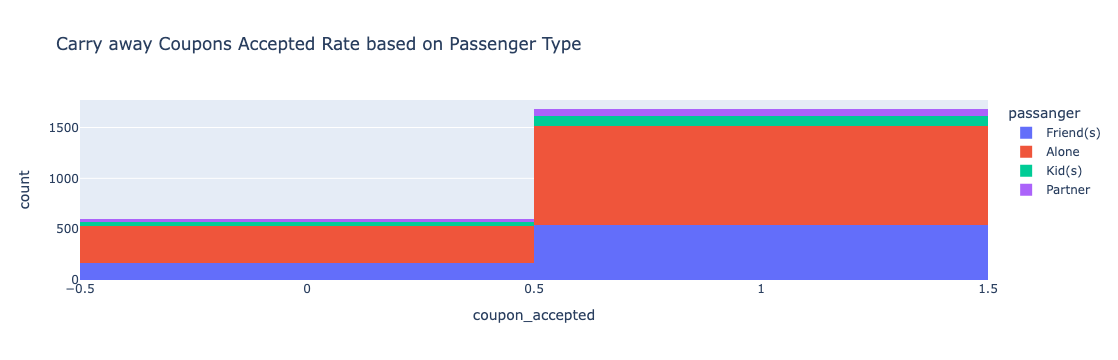

In [50]:
print(f'{'----------------------------------------------------------------------'}')
print(f'\033[1m{'Distinct passanger values'}\033[0m: {carry_away_coupon_data['passanger'].unique()}')
print(f'{'----------------------------------------------------------------------\n\n'}')

fig = px.histogram(data_frame=carry_away_coupon_data, x='coupon_accepted', color='passanger', title='Carry away Coupons Accepted Rate based on Passenger Type')
fig.show()

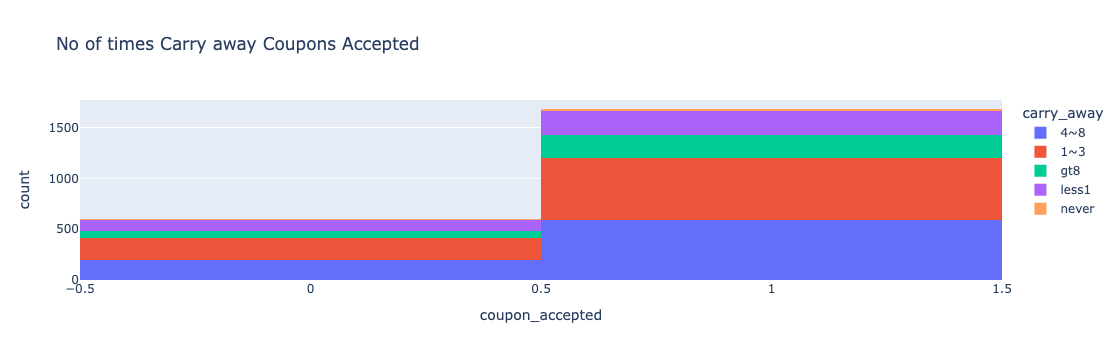

In [54]:
fig = px.histogram(data_frame=carry_away_coupon_data, x='coupon_accepted', color='carry_away', title='No of times Carry away Coupons Accepted')
fig.write_image("images/carry_away_coupons.png", format="png", width=800, height=600, scale=2)
fig.show()

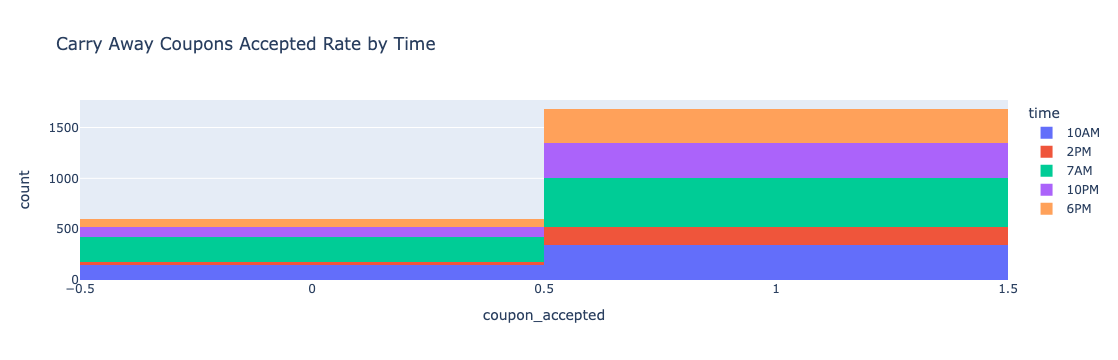

In [56]:
fig = px.histogram(data_frame=carry_away_coupon_data, x='coupon_accepted', color='time', title='Carry Away Coupons Accepted Rate by Time')
fig.write_image("images/carry_away_coupons_time.png", format="png", width=800, height=600, scale=2)
fig.show()

----------------------------------------------------------------------
Distinct carry_away values : ['4~8' '1~3' 'gt8' 'less1' 'never']
----------------------------------------------------------------------


carry_away_visit_never
False    0.785714
True     0.737123
Name: coupon_accepted, dtype: float64
Those never visited : 73.71%
Those visited atleast once: 78.57%


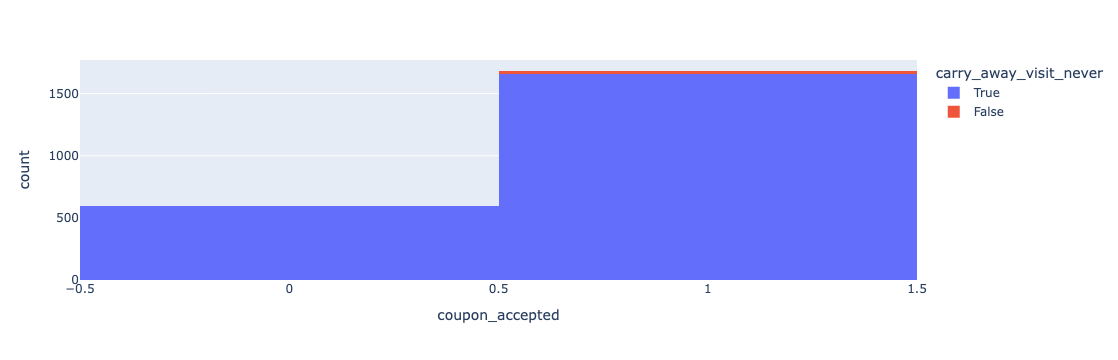

<class 'pandas.core.frame.DataFrame'>
Index: 2280 entries, 25 to 12680
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   destination              2280 non-null   object
 1   passanger                2280 non-null   object
 2   weather                  2280 non-null   object
 3   temperature              2280 non-null   int64 
 4   time                     2280 non-null   object
 5   coupon                   2280 non-null   object
 6   expiration               2280 non-null   object
 7   gender                   2280 non-null   object
 8   age                      2280 non-null   object
 9   marital_status           2280 non-null   object
 10  has_children             2280 non-null   int64 
 11  education                2280 non-null   object
 12  occupation               2280 non-null   object
 13  income                   2280 non-null   object
 14  bar                      2280 non-null   ob

In [60]:
# add a new column to the carry_away_coupon_data to indicate if the person never did carry away a month or more
print(f'{'----------------------------------------------------------------------'}')
print(f'{'Distinct carry_away values'} : {carry_away_coupon_data['carry_away'].unique()}')
print(f'{'----------------------------------------------------------------------\n\n'}')

carry_away_coupon_data['carry_away_visit_never'] = carry_away_coupon_data.apply(lambda row: ( (row['carry_away'] not in ['never'])), axis=1)


carry_away_coupon_accepted_never_visits = carry_away_coupon_data.groupby('carry_away_visit_never')['coupon_accepted'].mean()

print(carry_away_coupon_accepted_never_visits)

print(f'{'Those never visited '}: {carry_away_coupon_accepted_never_visits[True]:.2%}')
print(f'{'Those visited atleast once'}: {carry_away_coupon_accepted_never_visits[False]:.2%}')

fig = px.histogram(data_frame=carry_away_coupon_data, x='coupon_accepted', color='carry_away_visit_never')
fig.write_image("images/carry_away_coupons_never.png", format="png", width=800, height=600, scale=2)
fig.show()
carry_away_coupon_data.head()
carry_away_coupon_data.info()


Those accepted Carry Away coupons who are Alone or with Friend(s): 74.14%
Those accepted Carry Away coupons who are not Alone or with Friend(s): 70.51%


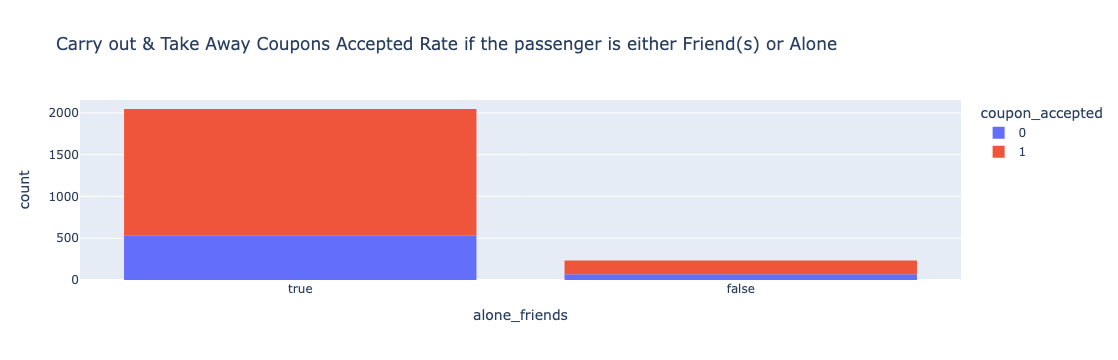

In [62]:
carry_away_coupon_data.head()

carry_away_coupon_data['alone_friends'] = carry_away_coupon_data.apply(lambda row: (row['passanger'] in ['Alone', 'Friend(s)']), axis=1)


carry_away_coupon_acceptance_based_passenger = carry_away_coupon_data.groupby('alone_friends')['coupon_accepted'].mean()

print(f'\033[1m{'Those accepted Carry Away coupons who are Alone or with Friend(s)'}\033[0m: \033[94m{carry_away_coupon_acceptance_based_passenger[True]:.2%}\033[0m')
print(f'\033[1m{'Those accepted Carry Away coupons who are not Alone or with Friend(s)'}\033[0m: \033[94m{carry_away_coupon_acceptance_based_passenger[False]:.2%}\033[0m')

fig = px.histogram(data_frame=carry_away_coupon_data, x='alone_friends', color='coupon_accepted', title='Carry out & Take Away Coupons Accepted Rate if the passenger is either Friend(s) or Alone')
fig.write_image("images/carry_away_coupons_alone_friends.png", format="png", width=800, height=600, scale=2)
fig.show()


#### 3. Carry out & Take away Coupons Accepted Rate based on Expiration and Direction of Travel


expiration
1d    0.785612
2h    0.662921
Name: coupon_accepted, dtype: float64


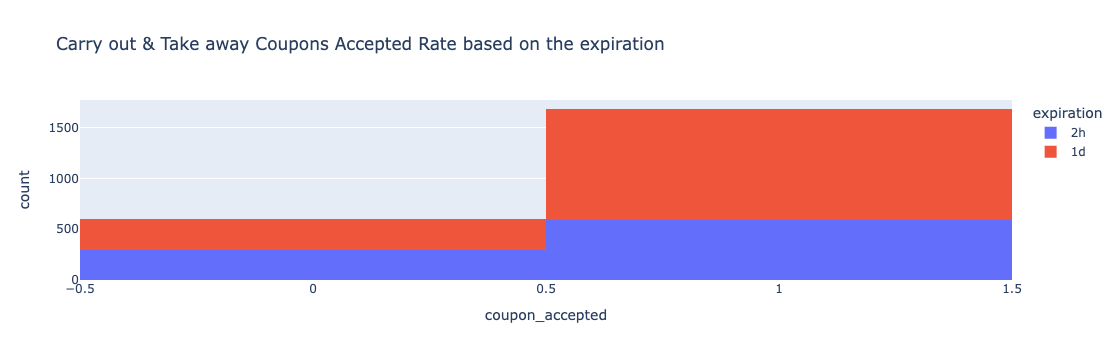

In [64]:
print(carry_away_coupon_data.groupby('expiration')['coupon_accepted'].mean())

fig = px.histogram(data_frame=carry_away_coupon_data, x='coupon_accepted', color='expiration', title='Carry out & Take away Coupons Accepted Rate based on the expiration')
fig.write_image("images/carry_away_coupons_expiration.png", format="png", width=800, height=600, scale=2)
fig.show()

direction_same
0    0.753614
1    0.705805
Name: coupon_accepted, dtype: float64


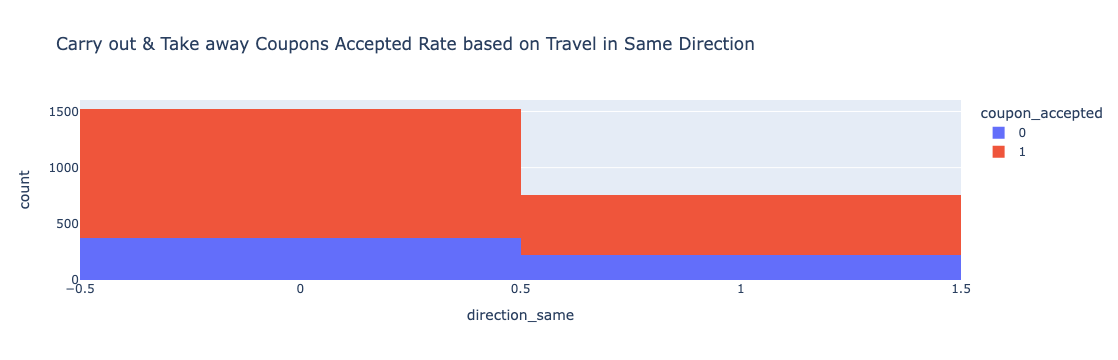

In [66]:
print(carry_away_coupon_data.groupby('direction_same')['coupon_accepted'].mean())
fig = px.histogram(data_frame=carry_away_coupon_data, x='direction_same', color='coupon_accepted', title='Carry out & Take away Coupons Accepted Rate based on Travel in Same Direction')
fig.write_image("images/carry_away_coupons_direction_same.png", format="png", width=800, height=600, scale=2)
fig.show()


expiration
1d    0.771513
2h    0.653207
Name: coupon_accepted, dtype: float64


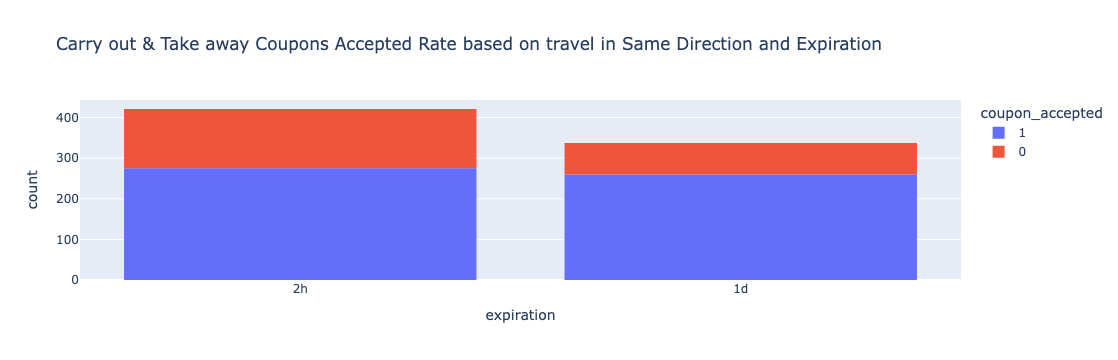

In [68]:
print(carry_away_coupon_data.query('direction_same==1').groupby('expiration')['coupon_accepted'].mean())
fig = px.histogram(data_frame=carry_away_coupon_data.query('direction_same==1'), x='expiration', color='coupon_accepted', title='Carry out & Take away Coupons Accepted Rate based on travel in Same Direction and Expiration')
fig.write_image("images/carry_away_coupons_direction_same_expiration.png", format="png", width=800, height=600, scale=2)
fig.show()


####  2. How about when we are traveling in the opposite direction


direction_opp
0    0.705805
1    0.753614
Name: coupon_accepted, dtype: float64


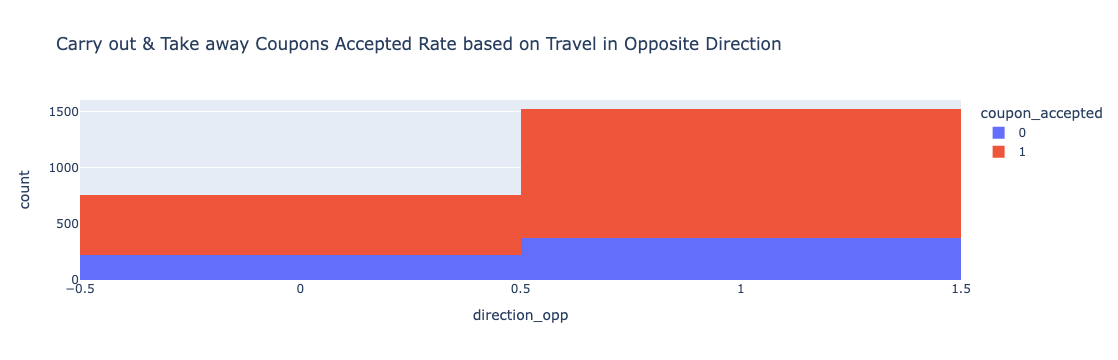

In [70]:
print(carry_away_coupon_data.groupby('direction_opp')['coupon_accepted'].mean())
fig = px.histogram(data_frame=carry_away_coupon_data, x='direction_opp', color='coupon_accepted', title='Carry out & Take away Coupons Accepted Rate based on Travel in Opposite Direction')
fig.write_image("images/carry_away_coupons_direction_opp.png", format="png", width=800, height=600, scale=2)
fig.show()

expiration
1d    0.790123
2h    0.671642
Name: coupon_accepted, dtype: float64


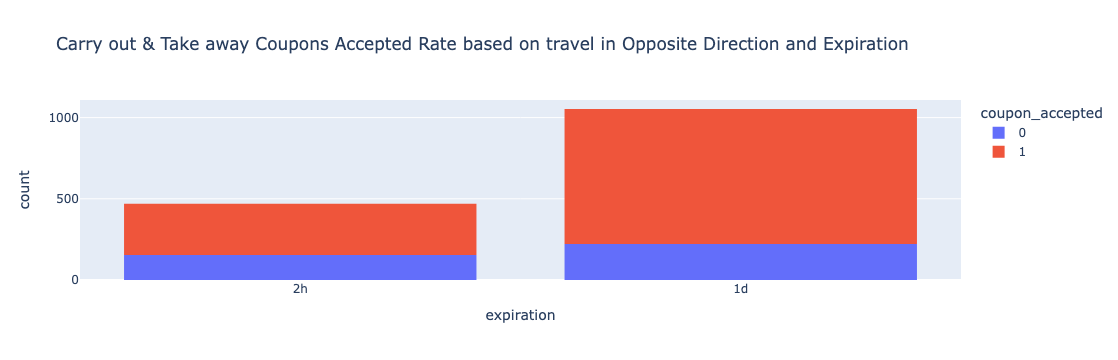

In [72]:
print(carry_away_coupon_data.query('direction_opp==1').groupby('expiration')['coupon_accepted'].mean())
fig = px.histogram(data_frame=carry_away_coupon_data.query('direction_opp==1'), x='expiration', color='coupon_accepted', title='Carry out & Take away Coupons Accepted Rate based on travel in Opposite Direction and Expiration')
fig.write_image("images/carry_away_coupons_direction_opp_expiration.png", format="png", width=800, height=600, scale=2)
fig.show()

#### Conclusion: 
##### 1. The drivers, who travel alone have higher chances of accepting the Carry Away coupon, then who are with friends.
##### 2. The drivers, once they accept the coupon there is higher chance they gonna use it.
##### 3. at 2PM, less likely to have accept the coupons
##### 4. Coupons of expiration of 1 day have higer chance of acceptance, especially when they are travelling in opposite direction